In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [41]:
df = pd.DataFrame({
    'Experience_Years': [1,2,3,4,5,6,7,8,9,10],
    'Salary':           [30,35,38,45,50,55,60,66,72,80]
})

In [ ]:
df.head()

,Experience_Years,Salary
0,1,30
1,2,35
2,3,38
3,4,45
4,5,50


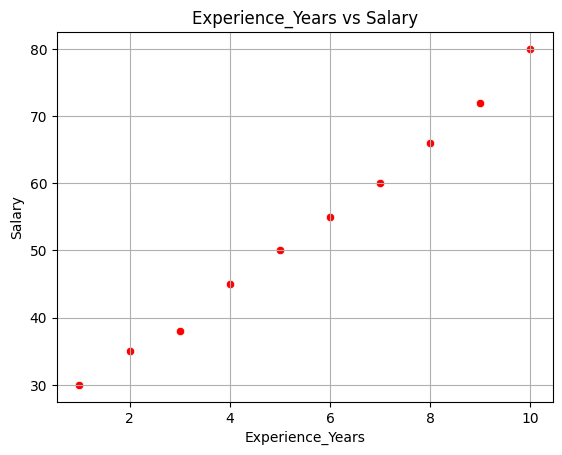

In [43]:
sns.scatterplot(data=df, x ='Experience_Years', y='Salary', color='red')
plt.grid()
plt.title('Experience_Years vs Salary')
plt.show()
plt.close()

#As Experience_Years increases, Salary also increases. Hence, there is a positive correlation between Experience_Years and Salary.

In [44]:
X = df[['Experience_Years']]
y = df['Salary']

In [52]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
df['Errors'] = y - y_pred

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 23.13333333333334
Coefficient: [5.44848485]


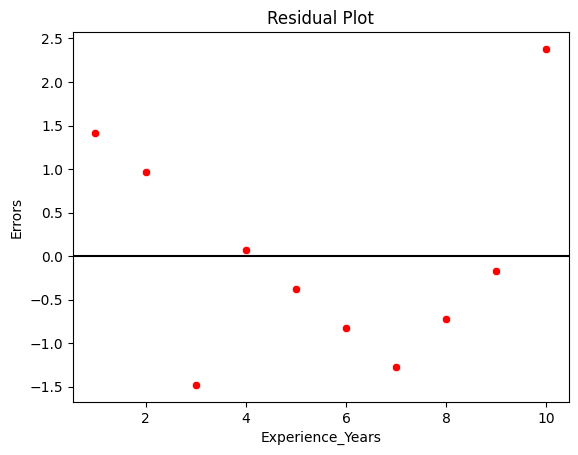

In [55]:
sns.scatterplot(data=df, x='Experience_Years', y='Errors', color='red')
plt.axhline(0, color='black')
plt.title("Residual Plot")
plt.show()

The above Figure Shows the Pattern in the Graph, and Errors are not a random There is some kind of Pattern in this 
* Key Assumption Linear Regression is violated 
* the Straight line model is not appropiate 
* we need to fix this 

to Fix this We will Look the Graph Shape as It is Making a U SHape that means We are gonna Square the X^2 formula for x2 Whats Actually happening Earlier Y = a+bX now Y=a+bX+cX2

if data are Randomly Scattered around 0 The model is perfect if Erros has a Pattern Like
* U shape → use square
* S shape → use cube
* Straight → use linear

In [57]:
df['X2'] = df['Experience_Years'] ** 2

In [58]:
# Using statsmodels to get a detailed summary
import statsmodels.formula.api as sm
df4 = df.copy()
df4.rename(columns={'Experience_Years' : 'X', 'Salary': 'Y'}, inplace=True)
formula_str='Y ~ X + X2'

result = sm.ols(formula = formula_str, data = df4).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1901.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           2.66e-10
Time:                        02:05:20   Log-Likelihood:                -10.225
No. Observations:                  10   AIC:                             26.45
Df Residuals:                       7   BIC:                             27.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0500      0.946     27.545      0.0